# **Chapter 8: Dimensionality Reduction**
# **Curse of Dimensionality**

- Data berdimensi tinggi cenderung jarang tersebar (sparse), sehingga jarak antar titik menjadi kurang bermakna.
- Penambahan dimensi membuat kebutuhan jumlah data meningkat secara eksponensial agar dapat merepresentasikan ruang secara efektif.
- Mengurangi jumlah dimensi (dimensionality reduction) dapat mempercepat proses pelatihan model dan meningkatkan performa model.


# **Pendekatan Utama dalam Dimensionality Reduction**

### Projection
Memproyeksikan data ke subruang berdimensi lebih rendah (contohnya PCA).

### Manifold Learning
Mengasumsikan bahwa data berada pada manifold berdimensi rendah yang tertanam dalam ruang berdimensi tinggi (contohnya LLE, Isomap).

> **Catatan**: Projection mengasumsikan struktur linier atau hampir linier, sementara manifold learning mampu menangkap struktur yang non-linear.


Principal Component Analysis (PCA)

- Menemukan sumbu ortogonal (principal components) yang menangkap variansi maksimum dalam data.
- Memproyeksikan data ke principal components awal untuk mengurangi dimensi.
- Menjaga sebanyak mungkin informasi (variansi) dalam data.
- Dihitung menggunakan metode **Singular Value Decomposition (SVD)**.

### **Contoh implementasi dengan Scikit-learn:**

Explained variance ratio: [0.9343217]


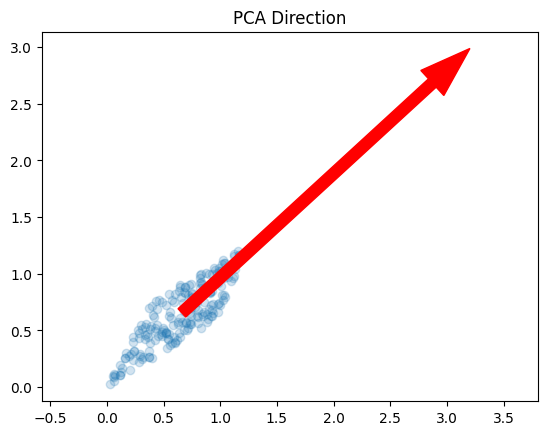

In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)
X = np.dot(np.random.rand(2, 2), np.random.rand(2, 200)).T

# Fit PCA untuk reduksi ke 1D
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

# Visualisasi data asli dan arah PCA
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
origin = np.mean(X, axis=0)
plt.arrow(origin[0], origin[1],
          pca.components_[0, 0]*3, pca.components_[0, 1]*3,
          color='red', width=0.1)
plt.title('PCA Direction')
plt.axis('equal')
plt.show()

# **Explained Variance dan Pemilihan Jumlah Komponen**
Explained variance ratio menunjukkan seberapa banyak variansi yang ditangkap oleh setiap principal component.

Visualisasi cumulative explained variance membantu menentukan jumlah minimum komponen yang mempertahankan informasi yang diinginkan (misalnya 95%).

### **Contoh visualisasi explained variance:**

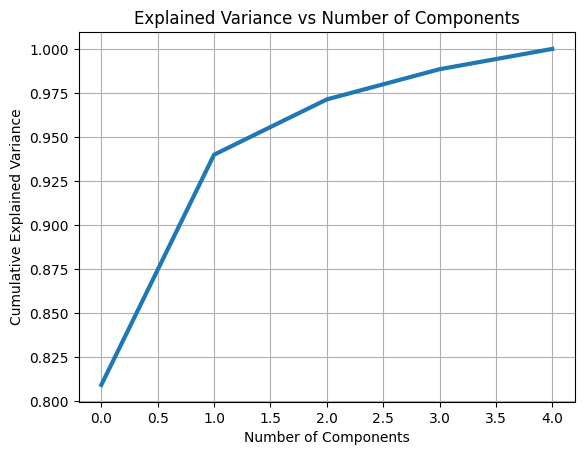

In [2]:
# Generate high-dimensional data
X_hd = np.dot(np.random.rand(5, 5), np.random.rand(5, 500)).T

pca_full = PCA()
pca_full.fit(X_hd)
cumsum = np.cumsum(pca_full.explained_variance_ratio_)

plt.plot(cumsum, linewidth=3)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.title('Explained Variance vs Number of Components')
plt.show()


# **Kernel PCA**
Kernel PCA memperluas PCA ke proyeksi non-linear menggunakan teknik kernel (kernel trick). Data secara implisit dipetakan ke ruang fitur berdimensi lebih tinggi.

Kernel yang umum digunakan:
- RBF (Gaussian)
- Polynomial

### **Contoh dengan kernel RBF:**

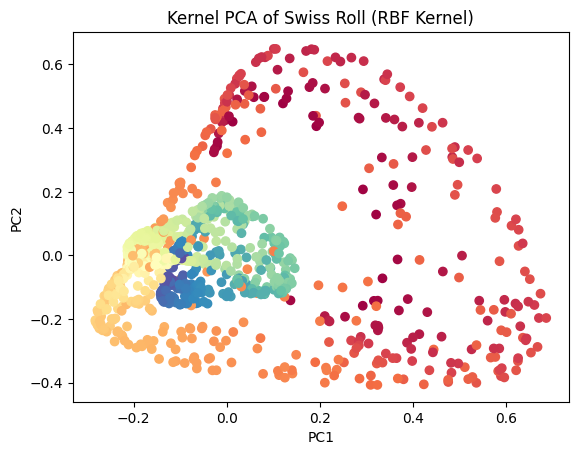

In [3]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_swiss_roll

X_swiss, color = make_swiss_roll(n_samples=1000, noise=0.1, random_state=42)

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_kpca = kpca.fit_transform(X_swiss)

plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title('Kernel PCA of Swiss Roll (RBF Kernel)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


# **Locally Linear Embedding (LLE)**
LLE adalah metode reduksi dimensi non-linear yang mempertahankan struktur lokal antar data poin:
- Setiap titik direkonstruksi dari tetangga terdekatnya.
- Hasil embedding berdimensi rendah menjaga hubungan lokal tersebut.

### **Contoh implementasi dengan Scikit-learn:**


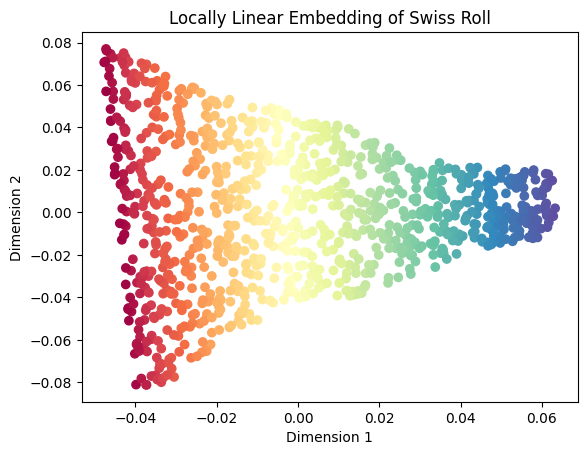

In [4]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=12)
X_lle = lle.fit_transform(X_swiss)

plt.scatter(X_lle[:, 0], X_lle[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title('Locally Linear Embedding of Swiss Roll')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


# **Metode Reduksi Dimensi Lainnya**
- Random Projections
- Multidimensional Scaling (MDS)
- Isomap
- t-SNE (terutama untuk visualisasi klaster)
- Linear Discriminant Analysis (LDA) untuk reduksi dimensi terawasi (supervised)
> Setiap metode memiliki kekuatan dan kelemahan masing-masing tergantung pada jenis data dan tujuan aplikasinya.